# Tensors
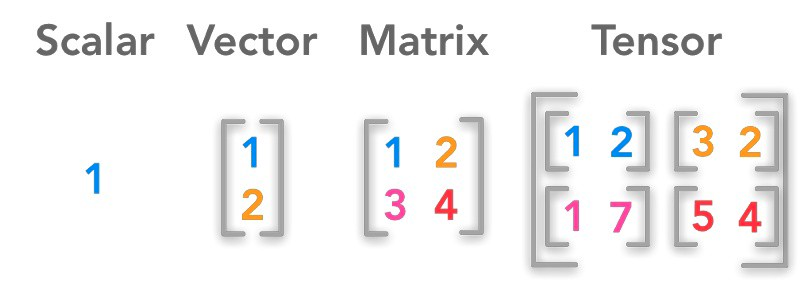


<div style="direction:rtl">
یک Tensor در واقع یک واحد محاسباتی می باشد که قرار است به گراف محاسباتی داده شود.
</div>





<div style="direction:rtl">
در ابتدا ما کتابخانه tensorflow را فراخوانی می کنیم و گراف محاسباتی را پیکربندی یا به اصطلاح reseting  می کنیم 

</div>


In [1]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

### Start a graph session:

<div style="direction:rtl">
هر کاری که قرار است در tensorflow انجام شود نیازمن یک جلسه می باشد که برای این منظور از تابع زیر استفاده می کنند 
</div>

`tf.Session()`

In [2]:
sess = tf.Session()

### Creating Tensors:
<div style="direction:rtl">
TensorFlow دارای توابع مختلفی برای ایجادtensors می باشد. برای مثال می توان با تابع زیر tensors از صفرها را ایجاد کرد

</div>



 `tf.zeros()` 

In [3]:
my_tensor = tf.zeros([1,20])

<div style="direction:rtl">
ما می توانیم tensors ایجاد شده را با دستور زیر مورد ارزیابی قرار دهیم  
</div>

`run()` 

In [4]:
sess.run(my_tensor)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

<div style="direction:rtl">
الگوریتم های TensorFlow باید بدانند که کدام شی متغییر است و کدام یک از آن ها ثابت می باشد. تفاوت بسیار زیادی بین این دو وجود دارد. چرا که مقدار ثابت در هنگام اجرا بدون تغییر باقی می ماند و قابل یادگیری نمی باشد. اما متغییر ها قابل یادگیری هستند دستور زیر برای تعریف متغییر مورد استفاده قرار می گیرد. 
</div>

`tf.Variable()` 

In [6]:
my_var = tf.Variable(tf.zeros([1,20]))

<div style="direction:rtl">
نکته قابل توجه در مورد variables این است که دیگر نمی توان با
 </div>
 
`sess.run(my_var)`

<div style="direction:rtl">
   آن ها را اجرا کرد سعی در اجرای آن باعث بروز خطا می شود. دلیل این است که TensorFlow از گراف محاسباتی برای انجام عملیات استفاده می کند و در زمان اجرا باید مقدار متغییر ها توسط دستور زیر تعیین شود 
 </div>

`my_var.initializer`.

In [7]:
sess.run(my_var.initializer)
sess.run(my_var)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

<div style="direction:rtl">
اجازه دهید تعداد سطرها و ستون های Variable خود را تعیین کنیم. 
</div>

In [8]:
row_dim = 2
col_dim = 3

<div style="direction:rtl">
در زیر ما دو Variable که تماما مقدار آن ها صفر و یک می باشند را تولید می کنیم
</div>

In [9]:
zero_var = tf.Variable(tf.zeros([row_dim, col_dim]))
ones_var = tf.Variable(tf.ones([row_dim, col_dim]))

In [10]:
sess.run(zero_var.initializer)
sess.run(ones_var.initializer)
print(sess.run(zero_var))
print(sess.run(ones_var))

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


### Creating Tensors Based on Other Tensor's Shape

<div style="direction:rtl">
اگر shape یک tensor به shape تنسور دیگری بستگی داشته باشد آنگاه می توان از دو تابع زیر برای ایجادtensorهای هم shape استفاده کرد     
</div>

`ones_like()` or `zeros_like()`.

In [11]:
zero_similar = tf.Variable(tf.zeros_like(zero_var))
ones_similar = tf.Variable(tf.ones_like(ones_var))

sess.run(ones_similar.initializer)
sess.run(zero_similar.initializer)
print(sess.run(ones_similar))
print(sess.run(zero_similar))

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]


### Filling a Tensor with a Constant

<div style="direction:rtl">
پر کردن یک Tensor با یک مقدار ثابت توسط دستور زیر انجام می شود:  
</div>

`tf.fill()`

In [12]:
fill_var = tf.Variable(tf.fill([row_dim, col_dim], -1))
sess.run(fill_var.initializer)
print(sess.run(fill_var))

[[-1 -1 -1]
 [-1 -1 -1]]



<div style="direction:rtl">
ما می توانیم مقادیر یک آرایه یا لیستی از ثابت ها را به عنوان مقادیر variable در نظر بگیریم 
</div>


In [12]:
# Create a variable from a constant
const_var = tf.Variable(tf.constant([8, 6, 7, 5, 3, 0, 9]))
# This can also be used to fill an array:
const_fill_var = tf.Variable(tf.constant(-1, shape=[row_dim, col_dim]))

sess.run(const_var.initializer)
sess.run(const_fill_var.initializer)

print(sess.run(const_var))
print(sess.run(const_fill_var))

[8 6 7 5 3 0 9]
[[-1 -1 -1]
 [-1 -1 -1]]


### Creating Tensors Based on Sequences and Ranges
<div style="direction:rtl">

TensorFlow دو تابع مشابه کتابخانه numpy برای ایجاد مقادیر در یک بازه فراهم آورده است این دو تابع به همراه مثالی در زیر آورده شده اند 
 
</div>

`linspace()` and `range()` 

In [13]:
# Linspace in TensorFlow
linear_var = tf.Variable(tf.linspace(start=0.0, stop=1.0, num=3)) # Generates [0.0, 0.5, 1.0] includes the end

# Range in TensorFlow
sequence_var = tf.Variable(tf.range(start=6, limit=15, delta=3)) # Generates [6, 9, 12] doesn't include the end

sess.run(linear_var.initializer)
sess.run(sequence_var.initializer)

print(sess.run(linear_var))
print(sess.run(sequence_var))

[ 0.   0.5  1. ]
[ 6  9 12]


### Random Number Tensors
<div style="direction:rtl">
ایجاد Tensors تصادفی یکی دیگر از راه های تولید داده توسط TensorFlow می باشد.   
</div>

In [13]:
rnorm_var = tf.random_normal([row_dim, col_dim], mean=0.0, stddev=1.0)
runif_var = tf.random_uniform([row_dim, col_dim], minval=0, maxval=4)

print(sess.run(rnorm_var))
print(sess.run(runif_var))

[[ 0.5731556   0.00761837 -0.9180737 ]
 [ 0.67728657 -0.4941535  -0.30197576]]
[[3.5026293 0.1830082 3.0724187]
 [2.8894982 2.037025  2.2295713]]


### Declare a placeholder:
<div style="direction:rtl">
برای ایجاد یک placeholder باید مقدار و shape آن و نوع آن را مشخص کنیم. که برای این منظور از دو پارامتر که داخل تعریف تابع وجود دارند استفاده می کنیم. نکته قابل توجه این است که اگر این مقادیر تعیین نشوند تعریف placeholder با مشکل مواجه می شود.  
</div>

 `tf.placeholder()`, which accepts a  (`tf.float32`) and a shape argument, `(4,4)`.  Note that the shape can be a tuple or a list, `[4,4]`.

In [10]:
x = tf.placeholder(tf.float32, shape=(4, 4))

<div style="direction:rtl">
برای این که نحوه کارکرد این شی را نشان دهیم باید مقادیری را به آن بفرستیم که این مقدار توسط یک دیکشنری  فرستاده می شود. 
</div>

 `feed_dict`

In [11]:
import numpy as np
# Input data to placeholder, note that 'rand_array' and 'x' are the same shape.
rand_array = np.random.rand(4, 4)

# Create a Tensor to perform an operation (here, y will be equal to x, a 4x4 matrix)
y = tf.identity(x)

# Print the output, feeding the value of x into the computational graph
print(sess.run(y, feed_dict={x: rand_array}))

[[0.20194308 0.8389927  0.3561712  0.8623327 ]
 [0.95385504 0.51486486 0.47393444 0.5041521 ]
 [0.4230374  0.7549111  0.5602608  0.7973533 ]
 [0.7091501  0.84477955 0.5751258  0.27237186]]


# Matrices and Matrix Operations


<div style="direction:rtl">
تعریف ماتریس همانی 
</div>

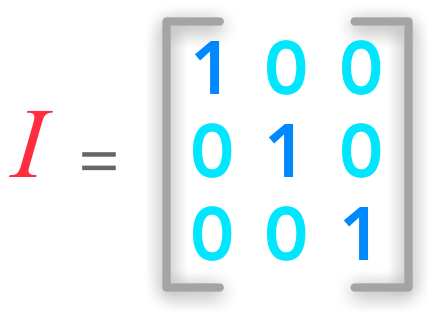

In [4]:
identity_matrix = tf.diag([1.0,1.0,1.0])
print(sess.run(identity_matrix))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [5]:
A = tf.truncated_normal([2,3])
print(sess.run(A))

[[ 0.4094003   1.0580746   0.4367303 ]
 [ 0.78093964 -0.94752467 -1.026587  ]]


In [6]:
B = tf.fill([2,3], 5.0)
print(sess.run(B))

[[5. 5. 5.]
 [5. 5. 5.]]


In [7]:
C = tf.random_uniform([3,2])
print(sess.run(C))

[[0.20238125 0.9442599 ]
 [0.71301794 0.9292356 ]
 [0.85265815 0.8194369 ]]


<div style="direction:rtl">
نکته می توان یک ماتریس از یک کتابخانه دیگر را به Tensor تبدیل کرد. برای این منظور از دستور زیر استفاده می کنیم  
</div>

`tf.convert_to_tensor()`

In [12]:
D = tf.convert_to_tensor(np.array([[1., 2., 3.], [-3., -7., -1.], [0., 5., -2.]]))
print(sess.run(D))


[[ 1.  2.  3.]
 [-3. -7. -1.]
 [ 0.  5. -2.]]


# Matrix Operations
# +
# -


In [13]:
print(sess.run(A+B))
print(sess.run(B-B))


[[5.997028  5.8241115 3.8129306]
 [4.6562448 5.7599754 5.305732 ]]
[[0. 0. 0.]
 [0. 0. 0.]]


# *

In [14]:
print(sess.run(tf.matmul(B, identity_matrix)))

[[5. 5. 5.]
 [5. 5. 5.]]


<div style="direction:rtl">
ترانهاده یک ماتریس از رابطه زیر بدست می آید 
</div>

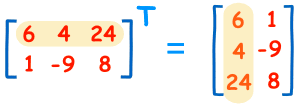

In [15]:
print(sess.run(tf.transpose(C)))

[[0.73016536 0.05827761 0.95181346]
 [0.56048596 0.8260479  0.6954417 ]]


<div style="direction:rtl">
determinant یک ماتریس از رابطه زیر بدست می آید 
</div>

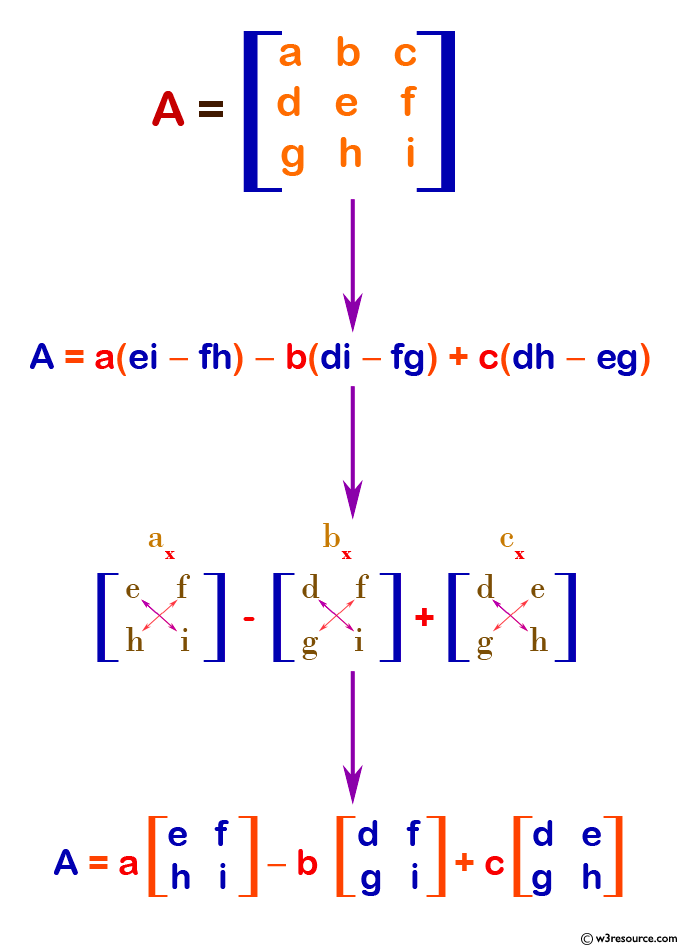

In [16]:
print(sess.run(tf.matrix_determinant(D)))

-37.99999999999999


<div style="direction:rtl">
مقادیر ویژه و بردارهای ویژه را نیز می توان به صورت زیر بدست آورد 
</div>

(https://www.math.hmc.edu/calculus/tutorials/eigenstuff/)

In [17]:
eigenvalues, eigenvectors = sess.run(tf.self_adjoint_eig(D))
print(eigenvalues)
print(eigenvectors)

[-10.65907521  -0.22750691   2.88658212]
[[ 0.21749542  0.63250104 -0.74339638]
 [ 0.84526515  0.2587998   0.46749277]
 [-0.4880805   0.73004459  0.47834331]]


### Visualizing the Variable Creation in TensorBoard
<div style="direction:rtl">
با استفاده از TensorBoard می توان مشاهده کرد که گراف محاسباتی چگونه به هم متصل شده است و هر یک از گره های این گراف چه عملی را انجام میدهد. با استفاده از این قابلیت می توان اطلاعات یک Session را به صورت گرافیکی نشان داد  
</div>

In [6]:
# Reset graph
ops.reset_default_graph()

# Start a graph session
sess = tf.Session()

# Create variable
my_var = tf.Variable(tf.zeros([1,20]))

# Add summaries to tensorboard
merged = tf.summary.merge_all()

# Initialize graph writer:
writer = tf.summary.FileWriter("tensorboard/", graph=sess.graph)

# Initialize operation
initialize_op = tf.global_variables_initializer()

# Run initialization of variable
sess.run(initialize_op)


<div style="direction:rtl">
حالا می توان با دستور زیر این گراف را مشاهده کرد 
</div>

`tensorboard --logdir=/tmp`


`http://0.0.0.0:6006/`

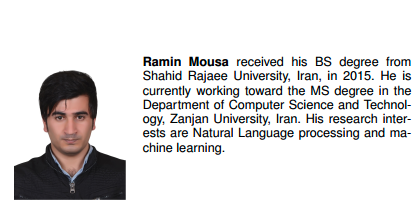